## Введение в анализ данных, ИАД-1

## НИУ ВШЭ, 2018-19 учебный год

### Домашнее задание №4. Градиентный бустинг ~~своими руками~~

Задание выполнил(а): _Самоделкина Мария_

### Общая информация
__Дата выдачи:__ 27.04.2019

__Дедлайн:__ 23:59 12.05.2019

### Оценивание и штрафы

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи
__Стирать условия нельзя!__

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Формат названия файла: homework_04_Фамилия_Имя.ipynb

__Задание 1. (0.5 балла)__

Мы будем использовать данные соревнования [Home Credit Default Risk](https://www.kaggle.com/c/home-credit-default-risk/data). 
* Загрузите таблицу application_train.csv;
* Запишите в Y столбец с целевой переменной;
* Удалите ненужные столбцы (для этого воспользуйтесь описанием);
* Определите тип столбцов и заполните пропуски - стратегия произвольная;
* Разбейте выборку в соотношении 70:30 с random_state=0.

Так как в данных значительный дисбаланс классов, в качестве метрики качества везде будем использовать площадь под precision-recall кривой.

In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
train = pd.read_csv('application_train.csv')

In [3]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train.drop(train.columns[list(range(60,122))], axis=1,inplace=True)
Y = train['TARGET']
del train['TARGET'], train['SK_ID_CURR']

In [5]:
train.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE
0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383
1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538
2,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
train.dtypes

NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OWN_CAR_AGE                    float64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
FLAG_EMAIL               

In [8]:
train.isnull().sum()

NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL                          0
OCCUPATION_T

In [6]:
#col = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
#train[col].fillna(train[col].mean(), inplace = True)
train.fillna(0, inplace = True)
#train.select_dtypes(include=['object']).fillna("", inplace = True)
train.isnull().sum()

NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
OWN_CAR_AGE                    0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_AP

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_f = pd.DataFrame(sc.fit_transform(train.loc[:, train.dtypes != ('object')]), columns=list(train.loc[:, train.dtypes != ('object')]))
train_sc = train_f.join(train.loc[:, train.dtypes == 'object'])
train_sc.head()

C:\Users\Pro18\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Pro18\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,-0.577538,0.142129,-0.478095,-0.166065,-0.505662,-0.149452,1.506880,-0.456215,0.379837,0.579154,...,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,-0.577538,0.426792,1.725450,0.592710,1.600480,-1.252750,-0.166821,-0.460115,1.078697,1.790855,...,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,-0.577538,-0.427196,-1.152888,-1.404507,-1.090025,-0.783451,-0.689509,-0.453299,0.206116,0.306869,...,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,-0.577538,-0.142533,-0.711430,0.177929,-0.651753,-0.928991,-0.680114,-0.473217,-1.375829,0.369143,...,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,-0.577538,-0.199466,-0.213734,-0.361658,-0.067390,0.563570,-0.892535,-0.473210,0.191639,-0.307263,...,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, Y, random_state=0, test_size=0.3)

In [9]:
X_train_f = X_train.select_dtypes(exclude=['object'])
X_test_f = X_test.select_dtypes(exclude=['object'])

__Задание 2. (1.5 балла)__

Обучите реализации градиентного бустинга LightGBM и Catboost на вещественных признаках без подбора параметров. 
Почему получилась заметная разница в качестве? 

В этом и последующих экспериментах необходимо измерять время обучения моделей.

In [13]:
import time
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import KFold

In [14]:
clf = CatBoostClassifier()
start = time. time()

clf.fit(X_train_f, y_train)

end = time. time()

Learning rate set to 0.076622
0:	learn: 0.6158044	total: 267ms	remaining: 4m 26s
1:	learn: 0.5517233	total: 466ms	remaining: 3m 52s
2:	learn: 0.4992997	total: 699ms	remaining: 3m 52s
3:	learn: 0.4556787	total: 935ms	remaining: 3m 52s
4:	learn: 0.4219166	total: 1.13s	remaining: 3m 45s
5:	learn: 0.3941378	total: 1.29s	remaining: 3m 33s
6:	learn: 0.3718689	total: 1.42s	remaining: 3m 21s
7:	learn: 0.3540707	total: 1.55s	remaining: 3m 12s
8:	learn: 0.3383027	total: 1.7s	remaining: 3m 6s
9:	learn: 0.3254186	total: 1.86s	remaining: 3m 3s
10:	learn: 0.3144907	total: 2.01s	remaining: 3m
11:	learn: 0.3064209	total: 2.18s	remaining: 2m 59s
12:	learn: 0.2993732	total: 2.31s	remaining: 2m 55s
13:	learn: 0.2924898	total: 2.46s	remaining: 2m 53s
14:	learn: 0.2873807	total: 2.62s	remaining: 2m 52s
15:	learn: 0.2828867	total: 2.84s	remaining: 2m 54s
16:	learn: 0.2787656	total: 3.06s	remaining: 2m 56s
17:	learn: 0.2759529	total: 3.25s	remaining: 2m 57s
18:	learn: 0.2729984	total: 3.41s	remaining: 2m 56s

158:	learn: 0.2476462	total: 25s	remaining: 2m 12s
159:	learn: 0.2476047	total: 25.2s	remaining: 2m 12s
160:	learn: 0.2475835	total: 25.4s	remaining: 2m 12s
161:	learn: 0.2475499	total: 25.6s	remaining: 2m 12s
162:	learn: 0.2475258	total: 25.7s	remaining: 2m 11s
163:	learn: 0.2475085	total: 25.9s	remaining: 2m 11s
164:	learn: 0.2474904	total: 26s	remaining: 2m 11s
165:	learn: 0.2474599	total: 26.2s	remaining: 2m 11s
166:	learn: 0.2474236	total: 26.3s	remaining: 2m 11s
167:	learn: 0.2473843	total: 26.5s	remaining: 2m 11s
168:	learn: 0.2473583	total: 26.6s	remaining: 2m 10s
169:	learn: 0.2473306	total: 26.7s	remaining: 2m 10s
170:	learn: 0.2472953	total: 26.9s	remaining: 2m 10s
171:	learn: 0.2472654	total: 27.1s	remaining: 2m 10s
172:	learn: 0.2472168	total: 27.2s	remaining: 2m 10s
173:	learn: 0.2471940	total: 27.3s	remaining: 2m 9s
174:	learn: 0.2471654	total: 27.5s	remaining: 2m 9s
175:	learn: 0.2471511	total: 27.6s	remaining: 2m 9s
176:	learn: 0.2471143	total: 27.7s	remaining: 2m 8s
1

315:	learn: 0.2435681	total: 48s	remaining: 1m 43s
316:	learn: 0.2435417	total: 48.2s	remaining: 1m 43s
317:	learn: 0.2435034	total: 48.3s	remaining: 1m 43s
318:	learn: 0.2434747	total: 48.4s	remaining: 1m 43s
319:	learn: 0.2434600	total: 48.6s	remaining: 1m 43s
320:	learn: 0.2434450	total: 48.7s	remaining: 1m 43s
321:	learn: 0.2434281	total: 48.9s	remaining: 1m 42s
322:	learn: 0.2434013	total: 49s	remaining: 1m 42s
323:	learn: 0.2433900	total: 49.1s	remaining: 1m 42s
324:	learn: 0.2433630	total: 49.3s	remaining: 1m 42s
325:	learn: 0.2433232	total: 49.4s	remaining: 1m 42s
326:	learn: 0.2433123	total: 49.5s	remaining: 1m 41s
327:	learn: 0.2432952	total: 49.7s	remaining: 1m 41s
328:	learn: 0.2432729	total: 49.8s	remaining: 1m 41s
329:	learn: 0.2432560	total: 50s	remaining: 1m 41s
330:	learn: 0.2432339	total: 50.1s	remaining: 1m 41s
331:	learn: 0.2432135	total: 50.3s	remaining: 1m 41s
332:	learn: 0.2431861	total: 50.4s	remaining: 1m 40s
333:	learn: 0.2431706	total: 50.5s	remaining: 1m 40s

472:	learn: 0.2402086	total: 1m 11s	remaining: 1m 19s
473:	learn: 0.2401914	total: 1m 11s	remaining: 1m 19s
474:	learn: 0.2401636	total: 1m 11s	remaining: 1m 18s
475:	learn: 0.2401478	total: 1m 11s	remaining: 1m 18s
476:	learn: 0.2401320	total: 1m 11s	remaining: 1m 18s
477:	learn: 0.2401126	total: 1m 11s	remaining: 1m 18s
478:	learn: 0.2400862	total: 1m 12s	remaining: 1m 18s
479:	learn: 0.2400472	total: 1m 12s	remaining: 1m 18s
480:	learn: 0.2400229	total: 1m 12s	remaining: 1m 18s
481:	learn: 0.2399942	total: 1m 12s	remaining: 1m 17s
482:	learn: 0.2399758	total: 1m 12s	remaining: 1m 17s
483:	learn: 0.2399626	total: 1m 12s	remaining: 1m 17s
484:	learn: 0.2399429	total: 1m 12s	remaining: 1m 17s
485:	learn: 0.2399229	total: 1m 13s	remaining: 1m 17s
486:	learn: 0.2399025	total: 1m 13s	remaining: 1m 17s
487:	learn: 0.2398927	total: 1m 13s	remaining: 1m 17s
488:	learn: 0.2398789	total: 1m 13s	remaining: 1m 16s
489:	learn: 0.2398628	total: 1m 13s	remaining: 1m 16s
490:	learn: 0.2398349	total:

627:	learn: 0.2371586	total: 1m 35s	remaining: 56.8s
628:	learn: 0.2371470	total: 1m 36s	remaining: 56.6s
629:	learn: 0.2371225	total: 1m 36s	remaining: 56.5s
630:	learn: 0.2371011	total: 1m 36s	remaining: 56.3s
631:	learn: 0.2370882	total: 1m 36s	remaining: 56.2s
632:	learn: 0.2370653	total: 1m 36s	remaining: 56s
633:	learn: 0.2370486	total: 1m 36s	remaining: 55.9s
634:	learn: 0.2370405	total: 1m 36s	remaining: 55.7s
635:	learn: 0.2370236	total: 1m 37s	remaining: 55.6s
636:	learn: 0.2370043	total: 1m 37s	remaining: 55.4s
637:	learn: 0.2369864	total: 1m 37s	remaining: 55.2s
638:	learn: 0.2369653	total: 1m 37s	remaining: 55.1s
639:	learn: 0.2369512	total: 1m 37s	remaining: 54.9s
640:	learn: 0.2369293	total: 1m 37s	remaining: 54.8s
641:	learn: 0.2369102	total: 1m 37s	remaining: 54.6s
642:	learn: 0.2368977	total: 1m 38s	remaining: 54.5s
643:	learn: 0.2368765	total: 1m 38s	remaining: 54.3s
644:	learn: 0.2368545	total: 1m 38s	remaining: 54.2s
645:	learn: 0.2368311	total: 1m 38s	remaining: 5

783:	learn: 0.2342791	total: 2m	remaining: 33.1s
784:	learn: 0.2342584	total: 2m	remaining: 33s
785:	learn: 0.2342478	total: 2m	remaining: 32.8s
786:	learn: 0.2342240	total: 2m	remaining: 32.7s
787:	learn: 0.2341936	total: 2m	remaining: 32.5s
788:	learn: 0.2341759	total: 2m 1s	remaining: 32.4s
789:	learn: 0.2341597	total: 2m 1s	remaining: 32.2s
790:	learn: 0.2341409	total: 2m 1s	remaining: 32.1s
791:	learn: 0.2341286	total: 2m 1s	remaining: 31.9s
792:	learn: 0.2341090	total: 2m 1s	remaining: 31.7s
793:	learn: 0.2340886	total: 2m 1s	remaining: 31.6s
794:	learn: 0.2340754	total: 2m 1s	remaining: 31.4s
795:	learn: 0.2340553	total: 2m 2s	remaining: 31.3s
796:	learn: 0.2340275	total: 2m 2s	remaining: 31.1s
797:	learn: 0.2340007	total: 2m 2s	remaining: 31s
798:	learn: 0.2339863	total: 2m 2s	remaining: 30.8s
799:	learn: 0.2339589	total: 2m 2s	remaining: 30.6s
800:	learn: 0.2339413	total: 2m 2s	remaining: 30.5s
801:	learn: 0.2339220	total: 2m 2s	remaining: 30.3s
802:	learn: 0.2339135	total: 2m

941:	learn: 0.2315050	total: 2m 23s	remaining: 8.85s
942:	learn: 0.2314969	total: 2m 23s	remaining: 8.7s
943:	learn: 0.2314770	total: 2m 24s	remaining: 8.55s
944:	learn: 0.2314611	total: 2m 24s	remaining: 8.39s
945:	learn: 0.2314526	total: 2m 24s	remaining: 8.24s
946:	learn: 0.2314401	total: 2m 24s	remaining: 8.09s
947:	learn: 0.2314283	total: 2m 24s	remaining: 7.94s
948:	learn: 0.2314135	total: 2m 24s	remaining: 7.78s
949:	learn: 0.2313878	total: 2m 24s	remaining: 7.63s
950:	learn: 0.2313664	total: 2m 25s	remaining: 7.47s
951:	learn: 0.2313524	total: 2m 25s	remaining: 7.32s
952:	learn: 0.2313314	total: 2m 25s	remaining: 7.17s
953:	learn: 0.2312983	total: 2m 25s	remaining: 7.02s
954:	learn: 0.2312829	total: 2m 25s	remaining: 6.86s
955:	learn: 0.2312661	total: 2m 25s	remaining: 6.71s
956:	learn: 0.2312492	total: 2m 25s	remaining: 6.56s
957:	learn: 0.2312321	total: 2m 26s	remaining: 6.4s
958:	learn: 0.2312194	total: 2m 26s	remaining: 6.25s
959:	learn: 0.2312030	total: 2m 26s	remaining: 6

In [15]:
print('Catboost time: ', end - start)
precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test_f)[:, 1])
print('Catboost pr-auc: ', auc(recall, precision))

Catboost time:  155.16268873214722
Catboost pr-auc:  0.23113673220555883


In [23]:
clf1 = LGBMClassifier()
start = time. time()

clf1.fit(X_train_f, y_train)

end = time. time()

In [24]:
print('LightGBM time: ', end - start)
precision, recall, _ = precision_recall_curve(y_test, clf1.predict_proba(X_test_f)[:, 1])
print('LightGBM pr-auc: ', auc(recall, precision))

LightGBM time:  4.727361679077148
LightGBM pr-auc:  0.2357275101576425


Можно заметить разницу в качестве двух моделей. Реализация LightGBM оказалась лучше Catboost, возможно, потому что Catboost лучше работает с категориальными признаками, а у нас представлены только вещественные.

__Задание 3. (2 балла)__

Подберите с CV=3 оптимальные параметры алгоритмов, изменяя:

* глубину деревьев;
* количество деревьев;
* темп обучения;
* оптимизируемый функционал.

Проанализируйте соотношения глубины и количества деревьев в зависимости от алгоритма.

*Подбор параметров для LGBMClassifier*
* Глубина деревев

In [18]:
kf = KFold(n_splits=3, shuffle = True, random_state = 0)
pr_auc = []
depth = [1,2,3,5,7,9]
for i in depth:
    clf1 = LGBMClassifier(max_depth = i)
    auc1 = 0
    for train1, test1 in kf.split(train_sc):
        X_train, X_test = train_sc.iloc[train1], train_sc.iloc[test1]
        y_train, y_test = Y[train1], Y[test1]
        X_train_f = X_train.select_dtypes(exclude=['object'])
        X_test_f = X_test.select_dtypes(exclude=['object'])        
        start = time. time()
        
        clf1.fit(X_train_f, y_train)
        
        end = time. time()
        precision, recall, _ = precision_recall_curve(y_test, clf1.predict_proba(X_test_f)[:, 1])
        print("depth: ", i, 'time: ', end - start)
        auc1 += auc(recall, precision)
    print("depth: ", i,'pr_auc mean: ', auc1/3)
    pr_auc.append(auc1/3)

depth:  1 time:  2.549185037612915
depth:  1 time:  2.437483310699463
depth:  1 time:  3.0398752689361572
depth:  1 pr_auc mean:  0.20088165712945952
depth:  2 time:  3.110685348510742
depth:  2 time:  2.8234550952911377
depth:  2 time:  3.5355489253997803
depth:  2 pr_auc mean:  0.21830429172504154
depth:  3 time:  4.026240110397339
depth:  3 time:  3.6133453845977783
depth:  3 time:  3.745990753173828
depth:  3 pr_auc mean:  0.22621599813319163
depth:  5 time:  4.752299070358276
depth:  5 time:  5.1133339405059814
depth:  5 time:  4.607685804367065
depth:  5 pr_auc mean:  0.2324630807851701
depth:  7 time:  7.796171426773071
depth:  7 time:  5.182196855545044
depth:  7 time:  4.788740873336792
depth:  7 pr_auc mean:  0.232092547469648
depth:  9 time:  5.478359937667847
depth:  9 time:  5.712733268737793
depth:  9 time:  4.863004684448242
depth:  9 pr_auc mean:  0.23065178881259055


In [20]:
print('max_depth =', depth[pr_auc.index(max(pr_auc))], ', pr-auc max =', max(pr_auc))

max_depth = 5 , pr-auc max = 0.2324630807851701


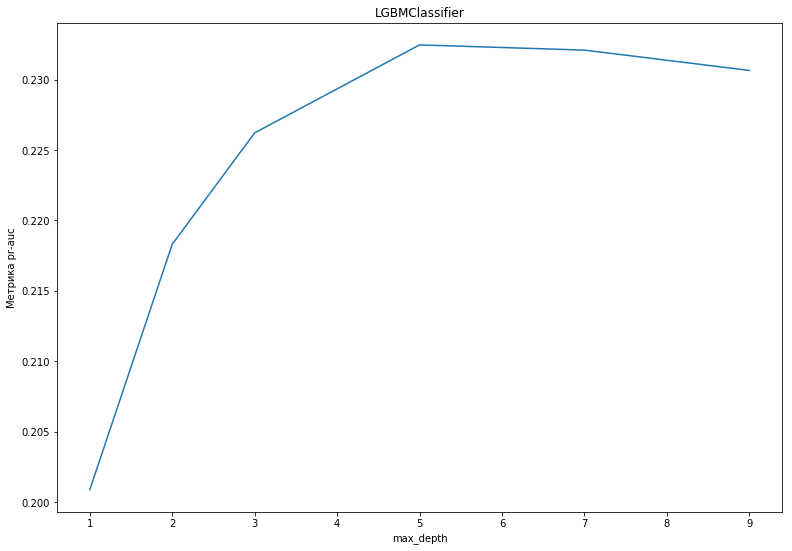

In [21]:
plt.figure(figsize=(13, 9))
plt.plot(depth, pr_auc)
plt.xlabel('max_depth')
plt.ylabel('Метрика pr-auc')
plt.title('LGBMClassifier') 
plt.show()

* Количество деревьев

In [25]:
pr_auc1 = []
iterations = [1, 5, 10, 100, 200, 300, 400, 500, 600, 700]
for i in iterations:
    clf1 = LGBMClassifier(n_estimators = i)
    auc1 = 0
    for train1, test1 in kf.split(train_sc):
        X_train, X_test = train_sc.iloc[train1], train_sc.iloc[test1]
        y_train, y_test = Y[train1], Y[test1]
        X_train_f = X_train.select_dtypes(exclude=['object'])
        X_test_f = X_test.select_dtypes(exclude=['object'])        
        start = time. time()
        
        clf1.fit(X_train_f, y_train)
        
        end = time. time()
        precision, recall, _ = precision_recall_curve(y_test, clf1.predict_proba(X_test_f)[:, 1])
        print("n_estimators: ", i, 'time: ', end - start)
        auc1 += auc(recall, precision)
    print("n_estimators: ", i,'pr_auc mean: ', auc1/3)
    pr_auc1.append(auc1/3)

n_estimators:  1 time:  1.1509230136871338
n_estimators:  1 time:  1.2985286712646484
n_estimators:  1 time:  1.3803083896636963
n_estimators:  1 pr_auc mean:  0.1937242997491118
n_estimators:  5 time:  1.338421106338501
n_estimators:  5 time:  1.436161756515503
n_estimators:  5 time:  1.37931227684021
n_estimators:  5 pr_auc mean:  0.20316862263265234
n_estimators:  10 time:  1.6924762725830078
n_estimators:  10 time:  1.7074344158172607
n_estimators:  10 time:  1.5289151668548584
n_estimators:  10 pr_auc mean:  0.21073420184668154
n_estimators:  100 time:  5.154222726821899
n_estimators:  100 time:  4.74032998085022
n_estimators:  100 time:  4.552830457687378
n_estimators:  100 pr_auc mean:  0.23042199887630488
n_estimators:  200 time:  7.153879404067993
n_estimators:  200 time:  8.100354194641113
n_estimators:  200 time:  9.6154146194458
n_estimators:  200 pr_auc mean:  0.22962996906783953
n_estimators:  300 time:  9.908619165420532
n_estimators:  300 time:  11.389561891555786
n_est

In [26]:
print('n_estimators =', iterations[pr_auc1.index(max(pr_auc1))], ', pr-auc max =', max(pr_auc1))

n_estimators = 100 , pr-auc max = 0.23042199887630488


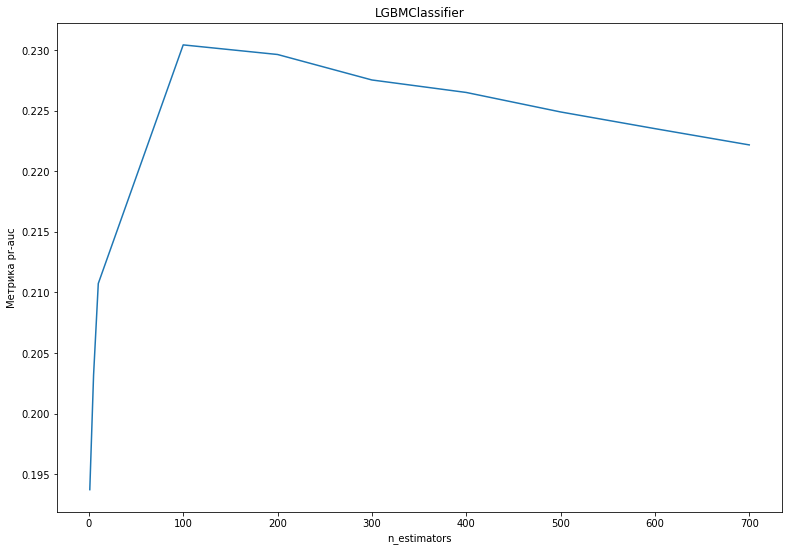

In [27]:
plt.figure(figsize=(13, 9))
plt.plot(iterations, pr_auc1)
plt.xlabel('n_estimators')
plt.ylabel('Метрика pr-auc')
plt.title('LGBMClassifier') 
plt.show()

* Скорость обучения

In [32]:
pr_auc2 = []
for i in np.arange(0.1,1.1,0.3):
    clf1 = LGBMClassifier(learning_rate = i)
    auc1 = 0
    for train1, test1 in kf.split(train_sc):
        X_train, X_test = train_sc.iloc[train1], train_sc.iloc[test1]
        y_train, y_test = Y[train1], Y[test1]
        X_train_f = X_train.select_dtypes(exclude=['object'])
        X_test_f = X_test.select_dtypes(exclude=['object'])        
        start = time. time()
        
        clf1.fit(X_train_f, y_train)
        
        end = time. time()
        precision, recall, _ = precision_recall_curve(y_test, clf1.predict_proba(X_test_f)[:, 1])
        print("learning_rate: ", i, 'time: ', end - start)
        auc1 += auc(recall, precision)
    print("learning_rate: ", i,'pr_auc mean: ', auc1/3)
    pr_auc2.append(auc1/3)

learning_rate:  0.1 time:  5.39373254776001
learning_rate:  0.1 time:  5.309807538986206
learning_rate:  0.1 time:  5.115328550338745
learning_rate:  0.1 pr_auc mean:  0.23042199887630488
learning_rate:  0.4 time:  3.9743802547454834
learning_rate:  0.4 time:  3.8915975093841553
learning_rate:  0.4 time:  4.058155298233032
learning_rate:  0.4 pr_auc mean:  0.18318929950050364
learning_rate:  0.7000000000000001 time:  3.3929331302642822
learning_rate:  0.7000000000000001 time:  4.413206338882446
learning_rate:  0.7000000000000001 time:  3.906558036804199
learning_rate:  0.7000000000000001 pr_auc mean:  0.17694598338745257
learning_rate:  1.0000000000000002 time:  3.973381519317627
learning_rate:  1.0000000000000002 time:  3.7549660205841064
learning_rate:  1.0000000000000002 time:  3.880629777908325
learning_rate:  1.0000000000000002 pr_auc mean:  0.1776061802683103


In [33]:
print('learning_rate =', (pr_auc2.index(max(pr_auc2)))*0.3+0.1, ', pr-auc max =', max(pr_auc2))

learning_rate = 0.1 , pr-auc max = 0.23042199887630488


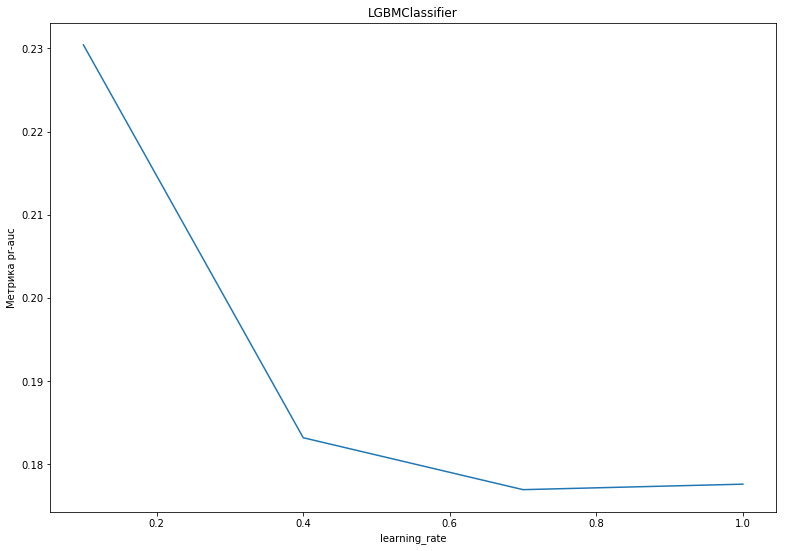

In [34]:
plt.figure(figsize=(13, 9))
plt.plot(np.arange(0.1,1.1,0.3), pr_auc2)
plt.xlabel('learning_rate')
plt.ylabel('Метрика pr-auc')
plt.title('LGBMClassifier') 
plt.show()

* Оптимизируемый функционал (указываем конкретный функционал для обучения)

In [35]:
clf1 = LGBMClassifier(objective = 'binary')
auc1 = 0
for train1, test1 in kf.split(train_sc):
    X_train, X_test = train_sc.iloc[train1], train_sc.iloc[test1]
    y_train, y_test = Y[train1], Y[test1]
    X_train_f = X_train.select_dtypes(exclude=['object'])
    X_test_f = X_test.select_dtypes(exclude=['object'])        
    start = time. time()
        
    clf1.fit(X_train_f, y_train)
        
    end = time. time()
    precision, recall, _ = precision_recall_curve(y_test, clf1.predict_proba(X_test_f)[:, 1])
    print("objective binary: ", 'time: ', end - start)
    auc1 += auc(recall, precision)
print('pr_auc mean: ', auc1/3)

objective binary:  time:  5.751628160476685
objective binary:  time:  5.701767683029175
objective binary:  time:  4.78421688079834
pr_auc mean:  0.23042199887630488


In [36]:
clf1 = LGBMClassifier()
auc1 = 0
for train1, test1 in kf.split(train_sc):
    X_train, X_test = train_sc.iloc[train1], train_sc.iloc[test1]
    y_train, y_test = Y[train1], Y[test1]
    X_train_f = X_train.select_dtypes(exclude=['object'])
    X_test_f = X_test.select_dtypes(exclude=['object'])        
    start = time. time()
        
    clf1.fit(X_train_f, y_train)
        
    end = time. time()
    precision, recall, _ = precision_recall_curve(y_test, clf1.predict_proba(X_test_f)[:, 1])
    print("auto objective: ", 'time: ', end - start)
    auc1 += auc(recall, precision)
print('pr_auc mean: ', auc1/3)

auto objective:  time:  5.214065313339233
auto objective:  time:  5.569117546081543
auto objective:  time:  4.8959128856658936
pr_auc mean:  0.23042199887630488


*Подбор параметров для CatBoost*
* Глубина деревьев

In [38]:
pr_auc3 = []
depth = [1,2,3,5,7,9]
for i in depth:
    clf1 = CatBoostClassifier(depth = i, logging_level='Silent')
    auc1 = 0
    for train1, test1 in kf.split(train_sc):
        X_train, X_test = train_sc.iloc[train1], train_sc.iloc[test1]
        y_train, y_test = Y[train1], Y[test1]
        X_train_f = X_train.select_dtypes(exclude=['object'])
        X_test_f = X_test.select_dtypes(exclude=['object'])        
        start = time. time()
        
        clf1.fit(X_train_f, y_train)
        
        end = time. time()
        precision, recall, _ = precision_recall_curve(y_test, clf1.predict_proba(X_test_f)[:, 1])
        print("depth: ", i, 'time: ', end - start)
        auc1 += auc(recall, precision)
    print("depth: ", i,'pr_auc mean: ', auc1/3)
    pr_auc3.append(auc1/3)

depth:  1 time:  91.88531732559204
depth:  1 time:  92.6843032836914
depth:  1 time:  92.66195726394653
depth:  1 pr_auc mean:  0.2227749986564961
depth:  2 time:  98.57111716270447
depth:  2 time:  95.49837493896484
depth:  2 time:  95.26616215705872
depth:  2 pr_auc mean:  0.23217503420560673
depth:  3 time:  116.67937278747559
depth:  3 time:  113.16376757621765
depth:  3 time:  106.35095596313477
depth:  3 pr_auc mean:  0.23460969164312942
depth:  5 time:  136.00009608268738
depth:  5 time:  123.91498827934265
depth:  5 time:  141.253653049469
depth:  5 pr_auc mean:  0.23497483288426077
depth:  7 time:  154.3721957206726
depth:  7 time:  157.7945258617401
depth:  7 time:  154.02427196502686
depth:  7 pr_auc mean:  0.23188303504690402
depth:  9 time:  216.9553074836731
depth:  9 time:  241.10593581199646
depth:  9 time:  229.88752007484436
depth:  9 pr_auc mean:  0.2215928923053966


In [39]:
print('max depth =', depth[pr_auc3.index(max(pr_auc3))], ', pr-auc max =', max(pr_auc3))

max depth = 5 , pr-auc max = 0.23497483288426077


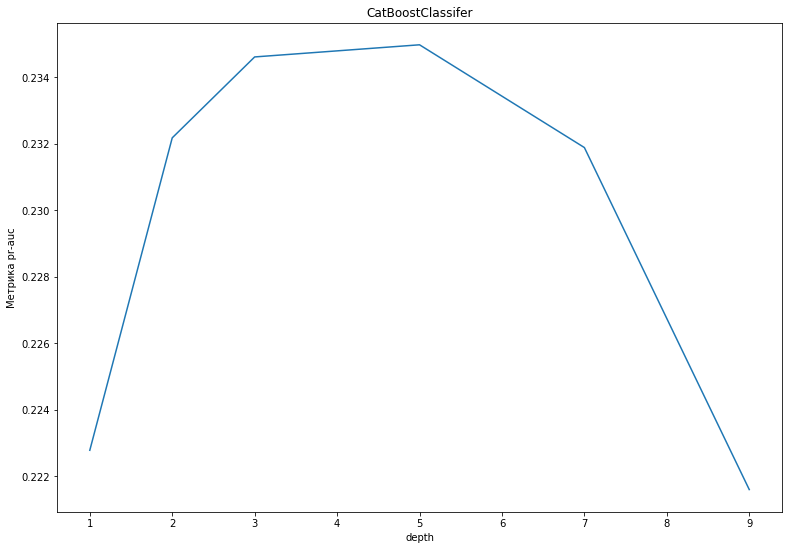

In [40]:
plt.figure(figsize=(13, 9))
plt.plot(depth, pr_auc3)
plt.xlabel('depth')
plt.ylabel('Метрика pr-auc')
plt.title('CatBoostClassifer') 
plt.show()

* Количество деревьев

In [41]:
pr_auc4 = []
iterations = [1, 5, 10, 100, 200, 300, 400, 500, 600, 700]
for i in iterations:
    clf1 = CatBoostClassifier(iterations = i, logging_level='Silent')
    auc1 = 0
    for train1, test1 in kf.split(train_sc):
        X_train, X_test = train_sc.iloc[train1], train_sc.iloc[test1]
        y_train, y_test = Y[train1], Y[test1]
        X_train_f = X_train.select_dtypes(exclude=['object'])
        X_test_f = X_test.select_dtypes(exclude=['object'])        
        start = time. time()
        
        clf1.fit(X_train_f, y_train)
        
        end = time. time()
        precision, recall, _ = precision_recall_curve(y_test, clf1.predict_proba(X_test_f)[:, 1])
        print("iterations: ", i, 'time: ', end - start)
        auc1 += auc(recall, precision)
    print("iterations: ", i,'pr_auc mean: ', auc1/3)
    pr_auc4.append(auc1/3)

iterations:  1 time:  3.674849510192871
iterations:  1 time:  2.9172494411468506
iterations:  1 time:  2.971163749694824
iterations:  1 pr_auc mean:  0.1437479378444209
iterations:  5 time:  3.5645487308502197
iterations:  5 time:  3.4287030696868896
iterations:  5 time:  3.454317808151245
iterations:  5 pr_auc mean:  0.2033556740524435
iterations:  10 time:  4.846759080886841
iterations:  10 time:  5.32477068901062
iterations:  10 time:  6.267295837402344
iterations:  10 pr_auc mean:  0.216741102920238
iterations:  100 time:  20.97996735572815
iterations:  100 time:  17.844225883483887
iterations:  100 time:  18.359185218811035
iterations:  100 pr_auc mean:  0.22291686107149902
iterations:  200 time:  29.083800077438354
iterations:  200 time:  34.96455693244934
iterations:  200 time:  34.247227907180786
iterations:  200 pr_auc mean:  0.2259333985777703
iterations:  300 time:  45.3816020488739
iterations:  300 time:  48.12490272521973
iterations:  300 time:  44.276522636413574
iteratio

In [42]:
print('iterations =', iterations[pr_auc4.index(max(pr_auc4))], ', pr-auc max =', max(pr_auc4))

iterations = 700 , pr-auc max = 0.23204182521474567


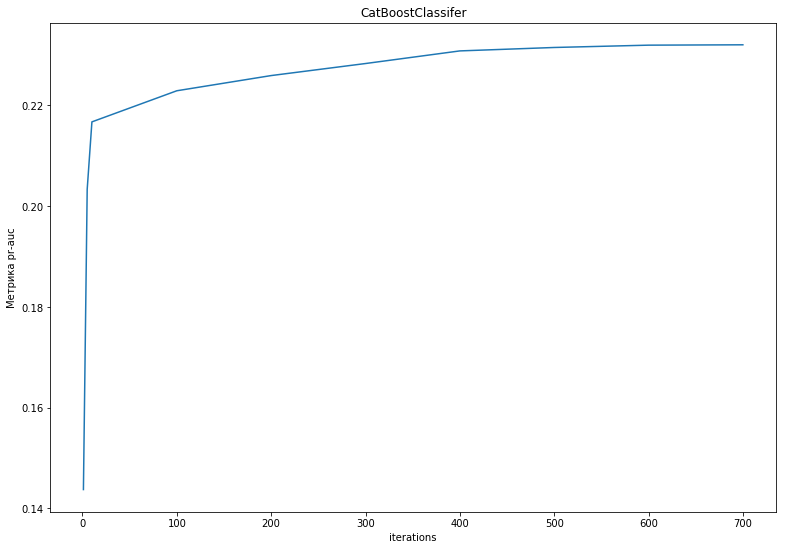

In [43]:
plt.figure(figsize=(13, 9))
plt.plot(iterations, pr_auc4)
plt.xlabel('iterations')
plt.ylabel('Метрика pr-auc')
plt.title('CatBoostClassifer') 
plt.show()

* Темп обучения

In [46]:
pr_auc5 = []
for i in np.arange(0.1,1.1,0.3):
    clf1 = CatBoostClassifier(learning_rate = i, logging_level='Silent')
    auc1 = 0
    for train1, test1 in kf.split(train_sc):
        X_train, X_test = train_sc.iloc[train1], train_sc.iloc[test1]
        y_train, y_test = Y[train1], Y[test1]
        X_train_f = X_train.select_dtypes(exclude=['object'])
        X_test_f = X_test.select_dtypes(exclude=['object'])        
        start = time. time()
        
        clf1.fit(X_train_f, y_train)
        
        end = time. time()
        precision, recall, _ = precision_recall_curve(y_test, clf1.predict_proba(X_test_f)[:, 1])
        print("learning_rate: ", i, 'time: ', end - start)
        auc1 += auc(recall, precision)
    print("learning_rate: ", i,'pr_auc mean: ', auc1/3)
    pr_auc5.append(auc1/3)

learning_rate:  0.1 time:  142.77208709716797
learning_rate:  0.1 time:  131.4117147922516
learning_rate:  0.1 time:  132.54869675636292
learning_rate:  0.1 pr_auc mean:  0.23117773484763462
learning_rate:  0.4 time:  132.77742886543274
learning_rate:  0.4 time:  132.61981058120728
learning_rate:  0.4 time:  133.2266082763672
learning_rate:  0.4 pr_auc mean:  0.19734071948208212
learning_rate:  0.7000000000000001 time:  133.95605516433716
learning_rate:  0.7000000000000001 time:  134.741375207901
learning_rate:  0.7000000000000001 time:  132.90602898597717
learning_rate:  0.7000000000000001 pr_auc mean:  0.17141740615600487
learning_rate:  1.0000000000000002 time:  142.76162242889404
learning_rate:  1.0000000000000002 time:  137.66204071044922
learning_rate:  1.0000000000000002 time:  135.00362539291382
learning_rate:  1.0000000000000002 pr_auc mean:  0.15267634994727278


In [47]:
print('learning_rate =', (pr_auc5.index(max(pr_auc5)))*0.3 + 0.1, ', pr-auc max =', max(pr_auc5))

learning_rate = 0.1 , pr-auc max = 0.23117773484763462


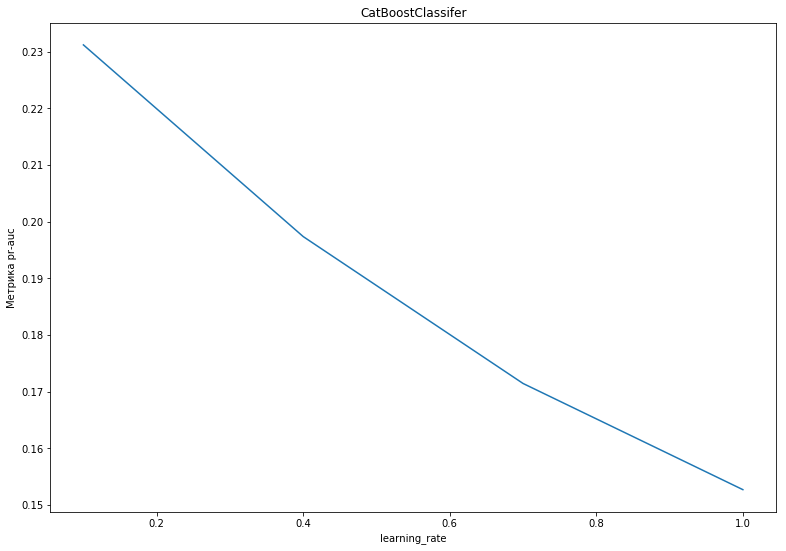

In [48]:
plt.figure(figsize=(13, 9))
plt.plot(np.arange(0.1,1.1,0.3), pr_auc5)
plt.xlabel('learning_rate')
plt.ylabel('Метрика pr-auc')
plt.title('CatBoostClassifer') 
plt.show()

* Оптимизируемый функционал

In [49]:
clf1 = CatBoostClassifier(loss_function = 'CrossEntropy', logging_level='Silent')
auc1 = 0
for train1, test1 in kf.split(train_sc):
    X_train, X_test = train_sc.iloc[train1], train_sc.iloc[test1]
    y_train, y_test = Y[train1], Y[test1]
    X_train_f = X_train.select_dtypes(exclude=['object'])
    X_test_f = X_test.select_dtypes(exclude=['object'])        
    start = time. time()

    clf1.fit(X_train_f, y_train)

    end = time. time()
    precision, recall, _ = precision_recall_curve(y_test, clf1.predict_proba(X_test_f)[:, 1])
    print("loss_function CrossEntropy", 'time: ', end - start)
    auc1 += auc(recall, precision)
print('pr_auc mean: ', auc1/3)

loss_function CrossEntropy time:  139.69121766090393
loss_function CrossEntropy time:  124.77061939239502
loss_function CrossEntropy time:  124.6954402923584
pr_auc mean:  0.23303318257341102


In [50]:
clf1 = CatBoostClassifier(loss_function = 'Logloss', logging_level='Silent')
auc1 = 0
for train1, test1 in kf.split(train_sc):
    X_train, X_test = train_sc.iloc[train1], train_sc.iloc[test1]
    y_train, y_test = Y[train1], Y[test1]
    X_train_f = X_train.select_dtypes(exclude=['object'])
    X_test_f = X_test.select_dtypes(exclude=['object'])        
    start = time. time()

    clf1.fit(X_train_f, y_train)

    end = time. time()
    precision, recall, _ = precision_recall_curve(y_test, clf1.predict_proba(X_test_f)[:, 1])
    print("loss_function Logloss", 'time: ', end - start)
    auc1 += auc(recall, precision)
print('pr_auc mean: ', auc1/3)

loss_function Logloss time:  124.25177812576294
loss_function Logloss time:  124.4301986694336
loss_function Logloss time:  123.9781847000122
pr_auc mean:  0.23303318257341102


*Анализ соотношения глубины и количества деревьев в зависимости от алгоритма*

Качество при росте глубины для LGBMClassifier сначала возрастает, потом начинает убывать. Растет до 5, максимум при глубине 5, потом медленно убывает.

Качество при росте глубины для CatBoostClassifier ведет себя также, но убывает быстрее. Растет до 5, максимум при глубине 5, потом сразу же убывает.

Качество при росте количества деревьев для LGBMClassifier резко возрастет до 100 итераций, потом медленно убывает.

Качество при росте количества деревьев для CatBoostClassifier резко возрастает до 10, потом медленно возрастает дальше. Чем больше итераций, тем лучше качетво.

Для LGBMClassifier качество при увеличении скорости обучения резко падает, затем стабилизируется.

Качество CatBoostClassifier при росте скорости ообучения убывает линейно.

__Задание 4. (3.5 балла)__

Добавьте категориальные признаки к вещественным следующими способами:

* как OHE признаки;
* как счетчики со сглаживанием.

При подсчете счетчиков запрещается использование циклов. 

На получившихся датасетах подберите параметры у каждого из алгоритмов. Как меняется время, необходимое для обучения модели в зависимости от способа кодирования? Сравните полученные результаты с встроенными методами обработки категориальных признаков. 

In [72]:
one_hot = pd.get_dummies(X_train.select_dtypes(include=['object']))
X_train_oh = X_train.select_dtypes(exclude=['object']).join(one_hot)

In [73]:
one_hot = pd.get_dummies(X_test.select_dtypes(include=['object']))
X_test_oh = X_test.select_dtypes(exclude=['object']).join(one_hot)

In [14]:
cat1 = CatBoostClassifier(iterations = 600, depth = 3, learning_rate = 0.1, logging_level='Silent')
start = time. time()

cat1.fit(X_train_oh, y_train)

end = time. time()

In [15]:
print('Catboost time: ', end - start)
precision, recall, _ = precision_recall_curve(y_test, cat1.predict_proba(X_test_oh)[:, 1])
print('Catboost pr-auc: ', auc(recall, precision))

Catboost time:  89.99266695976257
Catboost pr-auc:  0.23805788705562583


Catboost time  1 8.980292558670044
Catboost pr-auc:  0.11244199949677637
Catboost time  5 8.544602632522583
Catboost pr-auc:  0.20988137284224956
Catboost time  10 9.45065188407898
Catboost pr-auc:  0.22960547192696606
Catboost time  100 22.96605157852173
Catboost pr-auc:  0.23133777241399456
Catboost time  200 38.4997820854187
Catboost pr-auc:  0.23549658401224097
Catboost time  300 50.79506778717041
Catboost pr-auc:  0.237724035915973
Catboost time  400 67.23851346969604
Catboost pr-auc:  0.23984152493231775
Catboost time  500 72.59986209869385
Catboost pr-auc:  0.2420285049508693
Catboost time  600 86.01524138450623
Catboost pr-auc:  0.2424715247572366
Catboost time  700 97.33136200904846
Catboost pr-auc:  0.24161792446898267


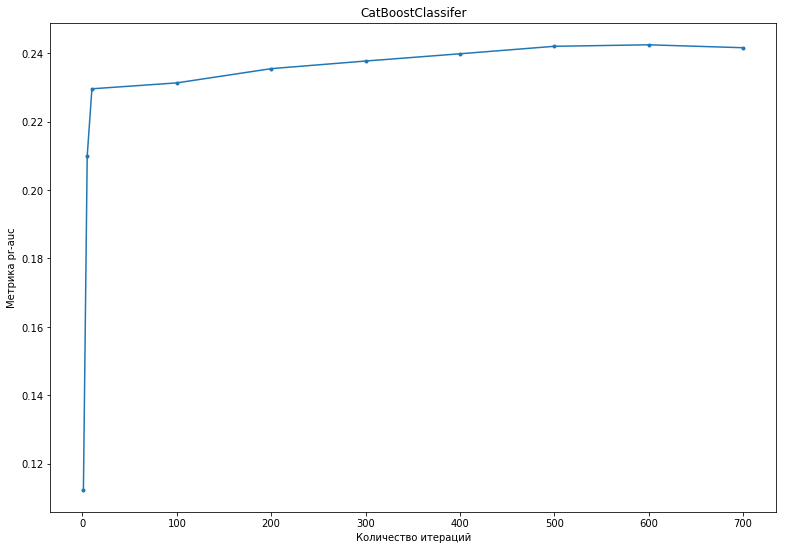

In [55]:
iterations = [1, 5, 10, 100, 200, 300, 400, 500, 600, 700]
history = []
for i in iterations:
    clf = CatBoostClassifier(iterations = i, logging_level='Silent')
    start = time. time()
    clf.fit(X_train_oh, y_train)
    end = time. time()
    print('Catboost time ', i, end - start)
    precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test_oh)[:, 1])
    pr_auc = auc(recall, precision)
    print('Catboost pr-auc: ', pr_auc)
    history.append(pr_auc)

plt.figure(figsize=(13, 9))
plt.plot(iterations, history, marker='.')
plt.xlabel('Количество итераций')
plt.ylabel('Метрика pr-auc')
plt.title('CatBoostClassifer')
plt.show()

Catboost time  1 87.03520917892456
Catboost pr-auc:  0.23212730001477566
Catboost time  2 95.34105396270752
Catboost pr-auc:  0.24132699376869107
Catboost time  3 105.11398077011108
Catboost pr-auc:  0.2436305385442916
Catboost time  5 124.29198503494263
Catboost pr-auc:  0.2431120539258083
Catboost time  7 150.2028546333313
Catboost pr-auc:  0.24241959735827015
Catboost time  9 213.3177261352539
Catboost pr-auc:  0.23114128333440456


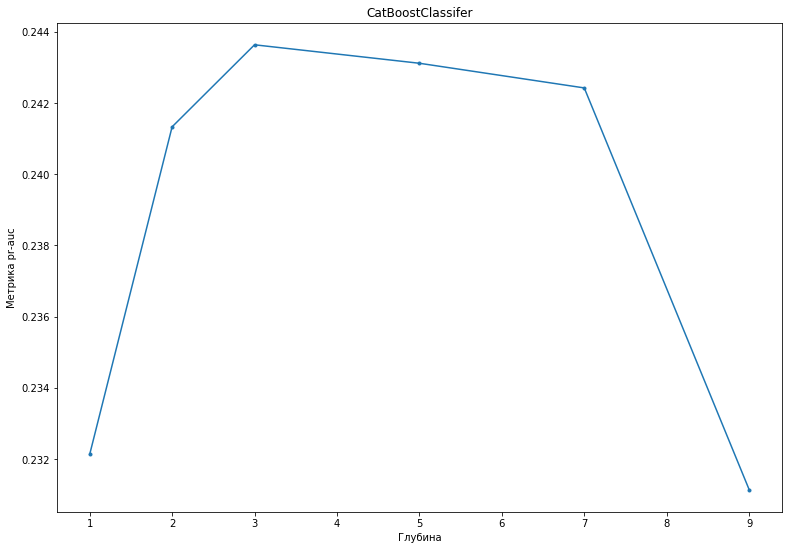

In [56]:
depth = [1,2,3,5,7,9]
history = []
for i in depth:
    clf = CatBoostClassifier(depth = i, logging_level='Silent')
    start = time. time()
    clf.fit(X_train_oh, y_train)
    end = time. time()
    print('Catboost time ', i, end - start)
    precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test_oh)[:, 1])
    pr_auc = auc(recall, precision)
    print('Catboost pr-auc: ', pr_auc)
    history.append(pr_auc)
    
plt.figure(figsize=(13, 9))
plt.plot(depth, history, marker='.')
plt.xlabel('Глубина')
plt.ylabel('Метрика pr-auc')
plt.title('CatBoostClassifer')
plt.show()

Catboost time  0.1 155.2595613002777
Catboost pr-auc:  0.23762337089538035
Catboost time  0.4 143.29426169395447
Catboost pr-auc:  0.20096331320418392
Catboost time  0.7000000000000001 142.13948893547058
Catboost pr-auc:  0.17649065025773653
Catboost time  1.0000000000000002 142.37312746047974
Catboost pr-auc:  0.1593076536848086


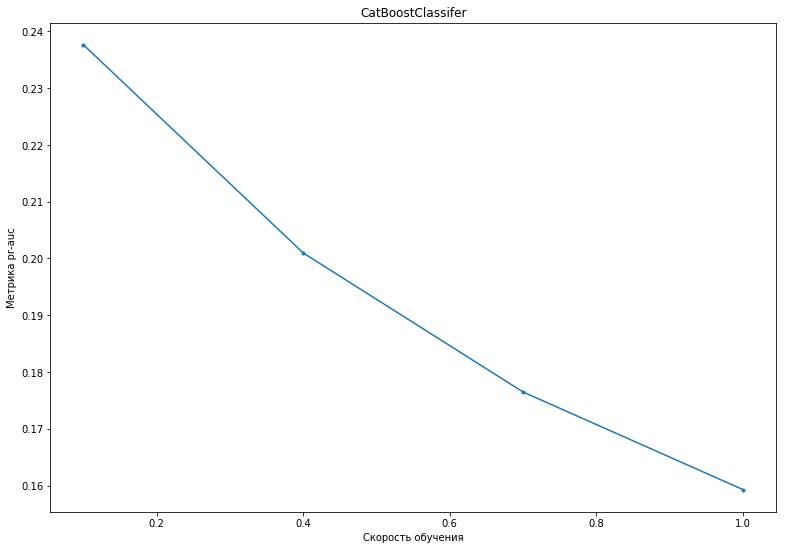

In [14]:
history = []
for i in np.arange(0.1,1.1,0.3):
    clf = CatBoostClassifier(learning_rate = i, logging_level='Silent')
    start = time. time()
    clf.fit(X_train_oh, y_train)
    end = time. time()
    print('Catboost time ', i, end - start)
    precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test_oh)[:, 1])
    pr_auc = auc(recall, precision)
    print('Catboost pr-auc: ', pr_auc)
    history.append(pr_auc)
    
plt.figure(figsize=(13, 9))
plt.plot(np.arange(0.1,1.1,0.3), history, marker='.')
plt.xlabel('Скорость обучения')
plt.ylabel('Метрика pr-auc')
plt.title('CatBoostClassifer')
plt.show()

In [16]:
lgbm1 = LGBMClassifier(n_estimators = 100, max_depth = 7, learning_rate = 0.1)
start = time. time()

lgbm1.fit(X_train_oh, y_train)

end = time. time()

print('LGBMClassifier time: ', end - start)
precision, recall, _ = precision_recall_curve(y_test, lgbm1.predict_proba(X_test_oh)[:, 1])
print('LGBMClassifier pr-auc: ', auc(recall, precision))

LGBMClassifier time:  9.62179183959961
LGBMClassifier pr-auc:  0.23678678939748904


LGBMClassifier time  1 2.3776450157165527
LGBMClassifier pr-auc:  0.1955093659203844
LGBMClassifier time  5 2.569133996963501
LGBMClassifier pr-auc:  0.2090870047720363
LGBMClassifier time  10 2.921191692352295
LGBMClassifier pr-auc:  0.2193250572950636
LGBMClassifier time  100 7.14988899230957
LGBMClassifier pr-auc:  0.24002455181738566
LGBMClassifier time  200 10.230656862258911
LGBMClassifier pr-auc:  0.2389479905426907
LGBMClassifier time  300 13.19872498512268
LGBMClassifier pr-auc:  0.23782641537387306
LGBMClassifier time  400 16.237603902816772
LGBMClassifier pr-auc:  0.2354490813102405
LGBMClassifier time  500 19.462982892990112
LGBMClassifier pr-auc:  0.23394075703296166
LGBMClassifier time  600 22.49488139152527
LGBMClassifier pr-auc:  0.2327002272900823
LGBMClassifier time  700 25.67637848854065
LGBMClassifier pr-auc:  0.23134496483368966


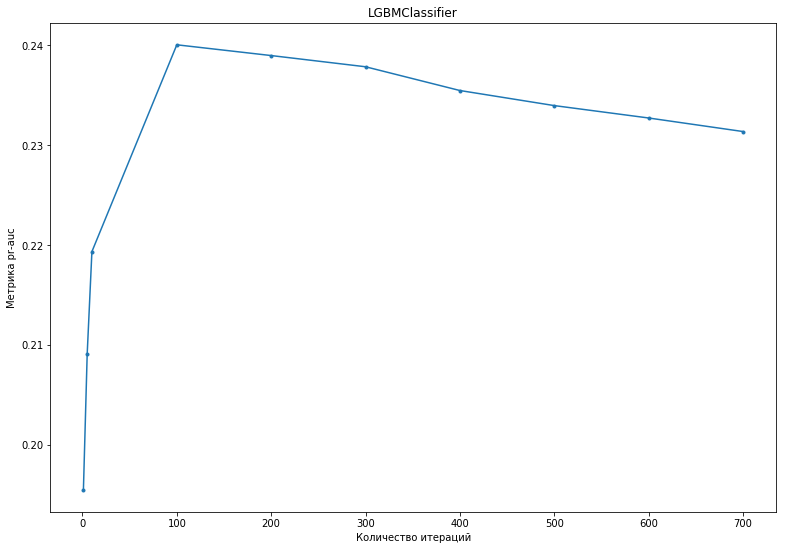

In [58]:
iterations = [1, 5, 10, 100, 200, 300, 400, 500, 600, 700]
history = []
for i in iterations:
    clf = LGBMClassifier(n_estimators = i)
    start = time. time()
    clf.fit(X_train_oh, y_train)
    end = time. time()
    print('LGBMClassifier time ', i, end - start)
    precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test_oh)[:, 1])
    pr_auc = auc(recall, precision)
    print('LGBMClassifier pr-auc: ', pr_auc)
    history.append(pr_auc)
    
plt.figure(figsize=(13, 9))
plt.plot(iterations, history, marker='.')
plt.xlabel('Количество итераций')
plt.ylabel('Метрика pr-auc')
plt.title('LGBMClassifier')
plt.show()

LGBMClassifier time  1 3.8536999225616455
LGBMClassifier pr-auc:  0.2044239703291793
LGBMClassifier time  2 4.4401328563690186
LGBMClassifier pr-auc:  0.2254392750397658
LGBMClassifier time  3 4.916856288909912
LGBMClassifier pr-auc:  0.2374940167488436
LGBMClassifier time  5 6.25627875328064
LGBMClassifier pr-auc:  0.24211688993706287
LGBMClassifier time  7 7.057135581970215
LGBMClassifier pr-auc:  0.24222739081728012
LGBMClassifier time  9 7.098027944564819
LGBMClassifier pr-auc:  0.24026233064575195


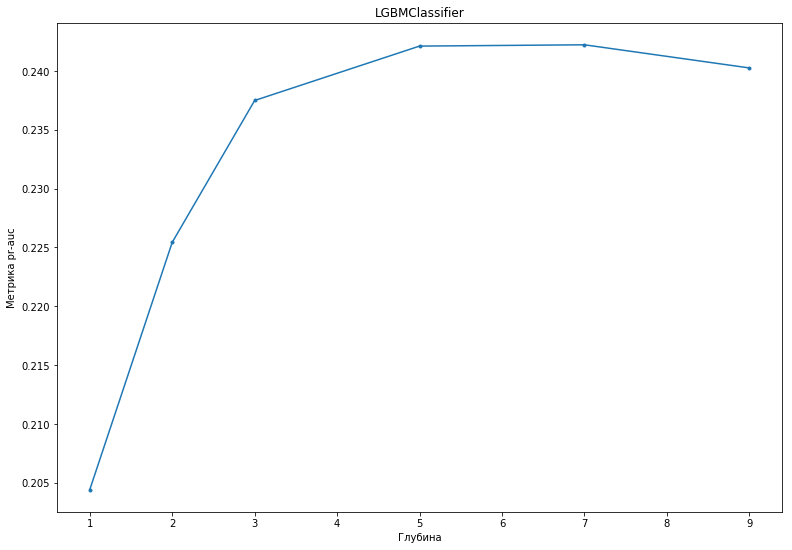

In [59]:
depth = [1,2,3,5,7,9]
history = []
for i in depth:
    clf = LGBMClassifier(max_depth = i)
    start = time. time()
    clf.fit(X_train_oh, y_train)
    end = time. time()
    print('LGBMClassifier time ', i, end - start)
    precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test_oh)[:, 1])
    pr_auc = auc(recall, precision)
    print('LGBMClassifier pr-auc: ', pr_auc)
    history.append(pr_auc)
    
plt.figure(figsize=(13, 9))
plt.plot(depth, history, marker='.')
plt.xlabel('Глубина')
plt.ylabel('Метрика pr-auc')
plt.title('LGBMClassifier')
plt.show()

LGBMClassifier time  0.1 10.372452020645142
LGBMClassifier pr-auc:  0.2365820933226902
LGBMClassifier time  0.4 6.555478572845459
LGBMClassifier pr-auc:  0.18905752161655962
LGBMClassifier time  0.7000000000000001 5.70774507522583
LGBMClassifier pr-auc:  0.174626730964965
LGBMClassifier time  1.0000000000000002 5.442453622817993
LGBMClassifier pr-auc:  0.1809609544547483


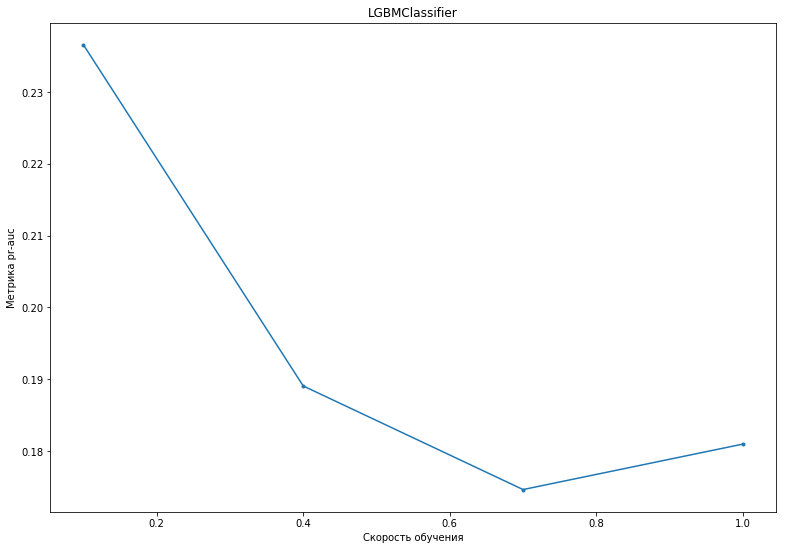

In [15]:
history = []
for i in np.arange(0.1,1.1,0.3):
    clf = LGBMClassifier(learning_rate = i)
    start = time. time()
    clf.fit(X_train_oh, y_train)
    end = time. time()
    print('LGBMClassifier time ', i, end - start)
    precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test_oh)[:, 1])
    pr_auc = auc(recall, precision)
    print('LGBMClassifier pr-auc: ', pr_auc)
    history.append(pr_auc)
    
plt.figure(figsize=(13, 9))
plt.plot(np.arange(0.1,1.1,0.3), history, marker='.')
plt.xlabel('Скорость обучения')
plt.ylabel('Метрика pr-auc')
plt.title('LGBMClassifier')
plt.show()

In [17]:
X_train_count = X_train
for col in list(X_train.loc[:, train.dtypes == 'object']):
    u = pd.DataFrame(X_train[col].unique())
    v = u.apply(lambda x: 0 if Y[X_train[X_train[col] == x[0]].index].mean() < 0.1 else 1, axis=1)
    d = dict(zip(u[0], list(v)))
    X_train_count[col] = X_train[col].apply(lambda y: d.get(y))

C:\Users\Pro18\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
X_test_count = X_test
for col in list(X_test.loc[:, train.dtypes == 'object']):
    u = pd.DataFrame(X_test[col].unique())
    v = u.apply(lambda x: 0 if Y[X_test[X_test[col] == x[0]].index].mean() < 0.1 else 1, axis=1)
    d = dict(zip(u[0], list(v)))
    X_test_count[col] = X_test[col].apply(lambda y: d.get(y))

C:\Users\Pro18\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
cat2 = CatBoostClassifier(iterations = 500, depth = 5, learning_rate = 0.1, logging_level='Silent')
start = time. time()

cat2.fit(X_train_count, y_train)

end = time. time()

print('Catboost time: ', end - start)
precision, recall, _ = precision_recall_curve(y_test, cat2.predict_proba(X_test_count)[:, 1])
print('Catboost pr-auc: ', auc(recall, precision))

Catboost time:  81.37812042236328
Catboost pr-auc:  0.2322029819453011


Catboost time  1 4.1613805294036865
Catboost pr-auc:  0.14826029635119553
Catboost time  5 5.033844470977783
Catboost pr-auc:  0.21019316659944082
Catboost time  10 5.773133277893066
Catboost pr-auc:  0.2233241988594207
Catboost time  100 18.82650637626648
Catboost pr-auc:  0.2308980890762169
Catboost time  200 36.01408338546753
Catboost pr-auc:  0.2331980082386961
Catboost time  300 45.43155765533447
Catboost pr-auc:  0.2379262744712586
Catboost time  400 63.32756567001343
Catboost pr-auc:  0.23803664340506983
Catboost time  500 70.78042078018188
Catboost pr-auc:  0.24102880168750068
Catboost time  600 77.07537984848022
Catboost pr-auc:  0.24052945682690716
Catboost time  700 93.38395619392395
Catboost pr-auc:  0.24001058242443146


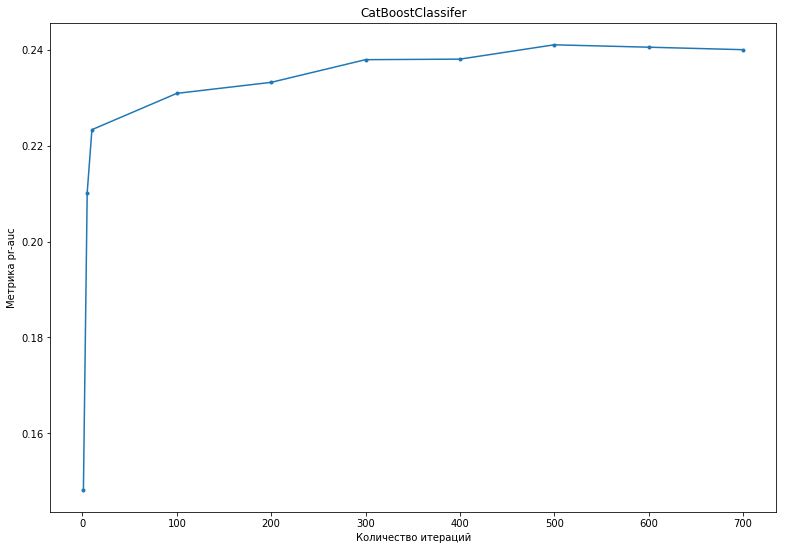

In [72]:
iterations = [1, 5, 10, 100, 200, 300, 400, 500, 600, 700]
history = []
for i in iterations:
    clf = CatBoostClassifier(iterations = i, logging_level='Silent')
    start = time. time()
    clf.fit(X_train_count, y_train)
    end = time. time()
    print('Catboost time ', i, end - start)
    precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test_count)[:, 1])
    pr_auc = auc(recall, precision)
    print('Catboost pr-auc: ', pr_auc)
    history.append(pr_auc)
    
plt.figure(figsize=(13, 9))
plt.plot(iterations, history, marker='.')
plt.xlabel('Количество итераций')
plt.ylabel('Метрика pr-auc')
plt.title('CatBoostClassifer')
plt.show()

Catboost time  1 80.64364838600159
Catboost pr-auc:  0.23092176259663416
Catboost time  2 89.74372839927673
Catboost pr-auc:  0.24181692757481082
Catboost time  3 98.94025087356567
Catboost pr-auc:  0.24335016197267084
Catboost time  5 115.34702944755554
Catboost pr-auc:  0.24409451347165773
Catboost time  7 141.11555814743042
Catboost pr-auc:  0.23903989139978038
Catboost time  9 202.757399559021
Catboost pr-auc:  0.22900802672762566


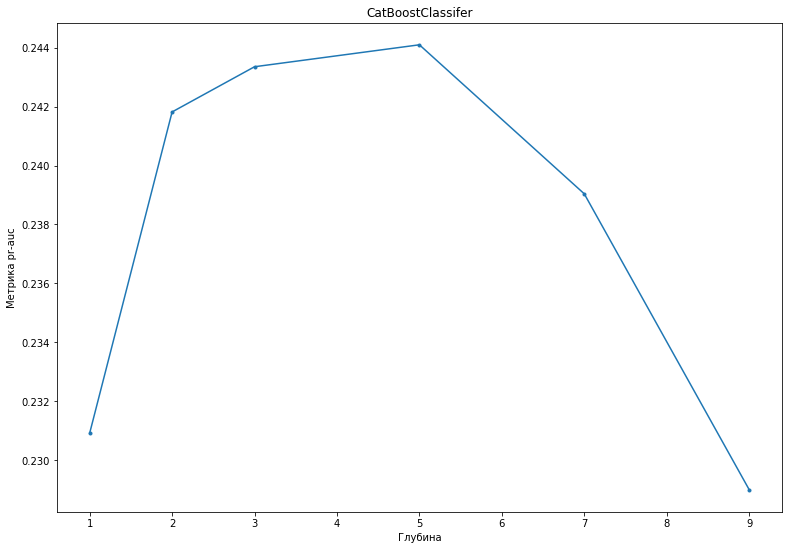

In [64]:
depth = [1,2,3,5,7,9]
history = []
for i in depth:
    clf = CatBoostClassifier(depth = i, logging_level='Silent')
    start = time. time()
    clf.fit(X_train_count, y_train)
    end = time. time()
    print('Catboost time ', i, end - start)
    precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test_count)[:, 1])
    pr_auc = auc(recall, precision)
    print('Catboost pr-auc: ', pr_auc)
    history.append(pr_auc)
    
plt.figure(figsize=(13, 9))
plt.plot(depth, history, marker='.')
plt.xlabel('Глубина')
plt.ylabel('Метрика pr-auc')
plt.title('CatBoostClassifer')
plt.show()

Catboost time  0.1 133.47609424591064
Catboost pr-auc:  0.23029235053238006
Catboost time  0.4 134.5953049659729
Catboost pr-auc:  0.1956238243089278
Catboost time  0.7000000000000001 133.1436731815338
Catboost pr-auc:  0.17143822264925512
Catboost time  1.0000000000000002 133.87492179870605
Catboost pr-auc:  0.1516994147930991


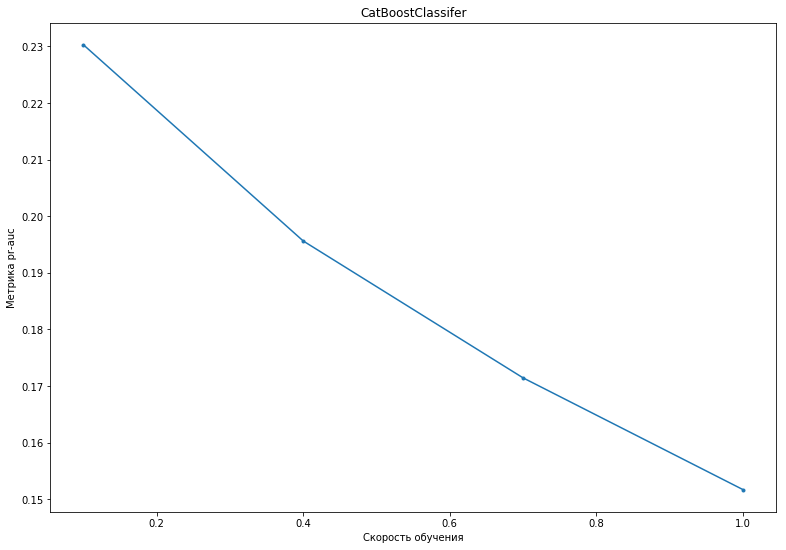

In [18]:
history = []
for i in np.arange(0.1,1.1,0.3):
    clf = CatBoostClassifier(learning_rate = i, logging_level='Silent')
    start = time. time()
    clf.fit(X_train_count, y_train)
    end = time. time()
    print('Catboost time ', i, end - start)
    precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test_count)[:, 1])
    pr_auc = auc(recall, precision)
    print('Catboost pr-auc: ', pr_auc)
    history.append(pr_auc)
    
plt.figure(figsize=(13, 9))
plt.plot(np.arange(0.1,1.1,0.3), history, marker='.')
plt.xlabel('Скорость обучения')
plt.ylabel('Метрика pr-auc')
plt.title('CatBoostClassifer')
plt.show()

In [20]:
lgbm2 = LGBMClassifier(iterations = 100, max_depth = 5, learning_rate = 0.1)
start = time. time()

lgbm2.fit(X_train_count, y_train)

end = time. time()

print('LGBMClassifier time: ', end - start)
precision, recall, _ = precision_recall_curve(y_test, lgbm2.predict_proba(X_test_count)[:, 1])
print('LGBMClassifier pr-auc: ', auc(recall, precision))

LGBMClassifier time:  4.904891729354858
LGBMClassifier pr-auc:  0.23007555578395772


LGBMClassifier time  1 1.3354318141937256
LGBMClassifier pr-auc:  0.1940244938148203
LGBMClassifier time  5 1.529909610748291
LGBMClassifier pr-auc:  0.2057776251980355
LGBMClassifier time  10 1.8231277465820312
LGBMClassifier pr-auc:  0.2168800576343084
LGBMClassifier time  100 5.100370407104492
LGBMClassifier pr-auc:  0.2374437743513321
LGBMClassifier time  200 7.54582667350769
LGBMClassifier pr-auc:  0.23671723338019926
LGBMClassifier time  300 9.78385043144226
LGBMClassifier pr-auc:  0.23524487437245245
LGBMClassifier time  400 12.14055347442627
LGBMClassifier pr-auc:  0.23441160341927836
LGBMClassifier time  500 15.033819675445557
LGBMClassifier pr-auc:  0.2325720322143084
LGBMClassifier time  600 17.07037878036499
LGBMClassifier pr-auc:  0.23132028226774834
LGBMClassifier time  700 19.364247798919678
LGBMClassifier pr-auc:  0.23035239330914087


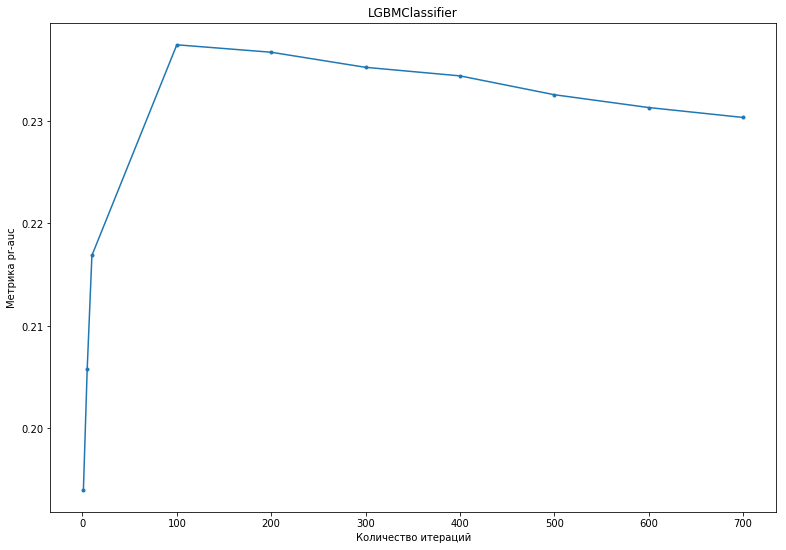

In [66]:
iterations = [1, 5, 10, 100, 200, 300, 400, 500, 600, 700]
history = []
for i in iterations:
    clf = LGBMClassifier(n_estimators = i)
    start = time. time()
    clf.fit(X_train_count, y_train)
    end = time. time()
    print('LGBMClassifier time ', i, end - start)
    precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test_count)[:, 1])
    pr_auc = auc(recall, precision)
    print('LGBMClassifier pr-auc: ', pr_auc)
    history.append(pr_auc)
    
plt.figure(figsize=(13, 9))
plt.plot(iterations, history, marker='.')
plt.xlabel('Количество итераций')
plt.ylabel('Метрика pr-auc')
plt.title('LGBMClassifier')
plt.show()

LGBMClassifier time  1 2.58309268951416
LGBMClassifier pr-auc:  0.20367660608020366
LGBMClassifier time  2 3.0029730796813965
LGBMClassifier pr-auc:  0.2262863097072011
LGBMClassifier time  3 3.585416316986084
LGBMClassifier pr-auc:  0.23673567879735966
LGBMClassifier time  5 4.618654727935791
LGBMClassifier pr-auc:  0.24028598188645497
LGBMClassifier time  7 5.300833225250244
LGBMClassifier pr-auc:  0.2389505237203768
LGBMClassifier time  9 5.0445170402526855
LGBMClassifier pr-auc:  0.23654629739437358


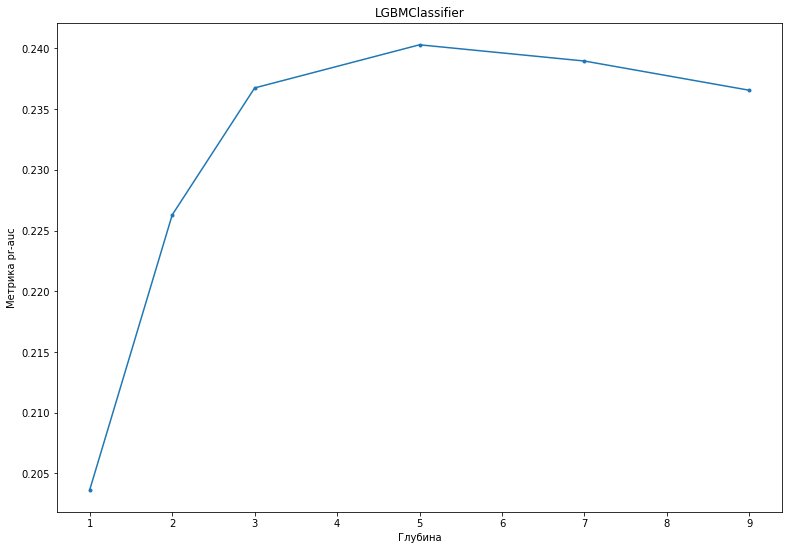

In [67]:
depth = [1,2,3,5,7,9]
history = []
for i in depth:
    clf = LGBMClassifier(max_depth = i)
    start = time. time()
    clf.fit(X_train_count, y_train)
    end = time. time()
    print('LGBMClassifier time ', i, end - start)
    precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test_count)[:, 1])
    pr_auc = auc(recall, precision)
    print('LGBMClassifier pr-auc: ', pr_auc)
    history.append(pr_auc)
    
plt.figure(figsize=(13, 9))
plt.plot(depth, history, marker='.')
plt.xlabel('Глубина')
plt.ylabel('Метрика pr-auc')
plt.title('LGBMClassifier')
plt.show()

LGBMClassifier time  0.1 5.653685808181763
LGBMClassifier pr-auc:  0.22914623022517225
LGBMClassifier time  0.4 4.308482646942139
LGBMClassifier pr-auc:  0.18677177272448436
LGBMClassifier time  0.7000000000000001 4.044191598892212
LGBMClassifier pr-auc:  0.1734917618559938
LGBMClassifier time  1.0000000000000002 3.802835464477539
LGBMClassifier pr-auc:  0.17613548878047786


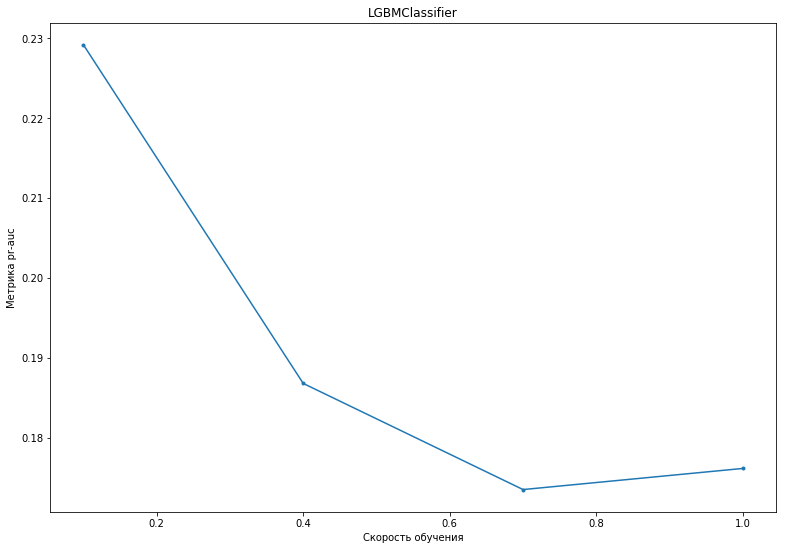

In [19]:
history = []
for i in np.arange(0.1,1.1,0.3):
    clf = LGBMClassifier(learning_rate = i)
    start = time. time()
    clf.fit(X_train_count, y_train)
    end = time. time()
    print('LGBMClassifier time ', i, end - start)
    precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test_count)[:, 1])
    pr_auc = auc(recall, precision)
    print('LGBMClassifier pr-auc: ', pr_auc)
    history.append(pr_auc)
    
plt.figure(figsize=(13, 9))
plt.plot(np.arange(0.1,1.1,0.3), history, marker='.')
plt.xlabel('Скорость обучения')
plt.ylabel('Метрика pr-auc')
plt.title('LGBMClassifier')
plt.show()

При использовании счетчиков со сглаживанием время обучения заметно ниже. Это обусловлено тем, что при OHE заметно увеличивется количество признаков.

*Встроенные методы обработки*

In [86]:
cat_auto = CatBoostClassifier(iterations = 500, depth = 5, learning_rate = 0.1, logging_level='Silent')

start = time. time()

cat_auto.fit(X_train, y_train, cat_features= np.where(X_train.dtypes != np.float)[0])
end = time. time()

print('Catboost time: ', end - start)
precision, recall, _ = precision_recall_curve(y_test, cat_auto.predict_proba(X_test)[:, 1])
print('Catboost pr-auc: ', auc(recall, precision))

Catboost time:  396.62772130966187
Catboost pr-auc:  0.22778210213482905


In [77]:
LGBM_train = X_train
LGBM_test = X_test
for col in list(LGBM_train.select_dtypes(include=['object'])):
    LGBM_train[col] = LGBM_train[col].astype('category')
    LGBM_test[col] = LGBM_test[col].astype('category')

C:\Users\Pro18\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Pro18\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [84]:
lgbm_auto = LGBMClassifier(iterations = 100, max_depth = 5, learning_rate = 0.1)
start = time. time()

lgbm_auto.fit(LGBM_train, y_train)

end = time. time()

print('LGBMClassifier time: ', end - start)
precision, recall, _ = precision_recall_curve(y_test, lgbm_auto.predict_proba(LGBM_test)[:, 1])
print('LGBMClassifier pr-auc: ', auc(recall, precision))

LGBMClassifier time:  5.870309829711914
LGBMClassifier pr-auc:  0.23379581842572655


Качество у встроенных LGBMClassifier выше, чем у Catboost.
В сравнении с реализованными OHE и счетчиками со сглаживанием встроенный Catboost проигрывает в качестве. У LGBMClassifier качество примерно то же.

__Задание 5. (1 балл)__

Реализуйте блендинг (получение ответов нескольких моделей и взятие их с весами (их нужно подбирать на обучающей выборке)) подобранных в предыдущем задании моделей и сравните качество.

In [45]:
X_train_blend_oh, X_test_blend_oh, y_train_blend_oh, y_test_blend_oh = train_test_split(X_train_oh, y_train, random_state=0, test_size=0.5)

In [46]:
cat1 = CatBoostClassifier(iterations = 600, depth = 3, learning_rate = 0.1, logging_level='Silent')
start = time. time()

cat1.fit(X_train_blend_oh, y_train_blend_oh)

end = time. time()

print('Catboost time: ', end - start)
precision, recall, _ = precision_recall_curve(y_test_blend_oh, cat1.predict_proba(X_test_blend_oh)[:, 1])
print('Catboost pr-auc: ', auc(recall, precision))

Catboost time:  45.56241965293884
Catboost pr-auc:  0.24239322336358368


In [47]:
lgbm1 = LGBMClassifier(n_estimators = 100, max_depth = 7, learning_rate = 0.1)
start = time. time()

lgbm1.fit(X_train_blend_oh, y_train_blend_oh)

end = time. time()

print('LGBMClassifier time: ', end - start)
precision, recall, _ = precision_recall_curve(y_test_blend_oh, lgbm1.predict_proba(X_test_blend_oh)[:, 1])
print('LGBMClassifier pr-auc: ', auc(recall, precision))

LGBMClassifier time:  4.170849800109863
LGBMClassifier pr-auc:  0.23686897817760189


In [48]:
X_train_blend_c, X_test_blend_c, y_train_blend_c, y_test_blend_c = train_test_split(X_train_count, y_train, random_state=0, test_size=0.5)

In [49]:
cat2 = CatBoostClassifier(iterations = 500, depth = 5, learning_rate = 0.1, logging_level='Silent')
start = time. time()

cat2.fit(X_train_blend_c, y_train_blend_c)

end = time. time()

print('Catboost time: ', end - start)
precision, recall, _ = precision_recall_curve(y_test_blend_c, cat2.predict_proba(X_test_blend_c)[:, 1])
print('Catboost pr-auc: ', auc(recall, precision))

Catboost time:  44.98482131958008
Catboost pr-auc:  0.23920152548694704


In [50]:
lgbm2 = LGBMClassifier(iterations = 100, max_depth = 5, learning_rate = 0.1)
start = time. time()

lgbm2.fit(X_train_blend_c, y_train_blend_c)

end = time. time()

print('LGBMClassifier time: ', end - start)
precision, recall, _ = precision_recall_curve(y_test_blend_c, lgbm2.predict_proba(X_test_blend_c)[:, 1])
print('LGBMClassifier pr-auc: ', auc(recall, precision))

LGBMClassifier time:  3.613332748413086
LGBMClassifier pr-auc:  0.23478260834715617


In [51]:
df_train = pd.DataFrame()
df_train['catboost ohe'] = cat1.predict_proba(X_test_blend_oh)[:, 1]
df_train['lightgbm ohe'] = lgbm1.predict_proba(X_test_blend_oh)[:, 1]
df_train['catboost counters'] = cat2.predict_proba(X_test_blend_c)[:, 1]
df_train['lightgbm counters'] = lgbm2.predict_proba(X_test_blend_c)[:, 1]

In [52]:
df_test = pd.DataFrame()
df_test['catboost ohe'] = cat1.predict_proba(X_test_oh)[:, 1]
df_test['lightgbm ohe'] = lgbm1.predict_proba(X_test_oh)[:, 1]
df_test['catboost counters'] = cat2.predict_proba(X_test_count)[:, 1]
df_test['lightgbm counters'] = lgbm2.predict_proba(X_test_count)[:, 1]

In [55]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(df_train,y_test_blend_oh)
lr.coef_

array([0.48276585, 0.26749432, 0.31322565, 0.00107666])

In [54]:
precision, recall, _ = precision_recall_curve(y_test, lr.predict(df_test))
print('Blending models pr-auc: ', auc(recall, precision))

Blending models pr-auc:  0.23438526072869395


In [62]:
blending = np.sum(lr.coef_ * df_test.values, axis = 1)
blending

array([0.2209972 , 0.037033  , 0.09123943, ..., 0.05387437, 0.03316007,
       0.06776965])

Качество получилось немного хуже. Это можно объяснить тем, что модели дают правильные ответы в разных местах.

__Задание 6. (1.5 балла)__

В задании 3 вы подобрали гиперпараметры для LightGBM и CatBoost на вещественных признаках. Визуализируйте важности признаков, посчитанные этими алгоритмами, в виде горизонтального bar-plot (отсортируйте признаки по убыванию важности, подпишите названия признаков по оси y).

Для каждого из двух алгоритмов удалите неважные признаки (обычно по bar-plot хорошо видно порог на важность, с которого начинается хвост неважных признаков) и обучите ту же модель на получившихся данных. Сильно ли упало качество при удалении признаков, которые модель считает неважными?

In [36]:
lgbm_clf = LGBMClassifier(max_depth = 5, 
                          n_estimators = 100, 
                          learning_rate = 0.1)
start = time. time()
lgbm_clf.fit(X_train_f, y_train)
end = time. time()
print('LGBMClassifier time: ', end - start)
precision, recall, _ = precision_recall_curve(y_test, lgbm_clf.predict_proba(X_test_f)[:, 1])
auc(recall, precision)

LGBMClassifier time:  6.05182409286499


0.22927049661972454

In [37]:
cat_clf = CatBoostClassifier(depth = 5, 
                          iterations = 700, 
                          learning_rate = 0.1, 
                          logging_level='Silent')
start = time. time()
cat_clf.fit(X_train_f, y_train)
end = time. time()
print('CatBoostClassifier time: ', end - start)
precision, recall, _ = precision_recall_curve(y_test, cat_clf.predict_proba(X_test_f)[:, 1])
auc(recall, precision)

CatBoostClassifier time:  101.03720903396606


0.23221399643112842

Text(0.5, 0, 'lgbm importance')

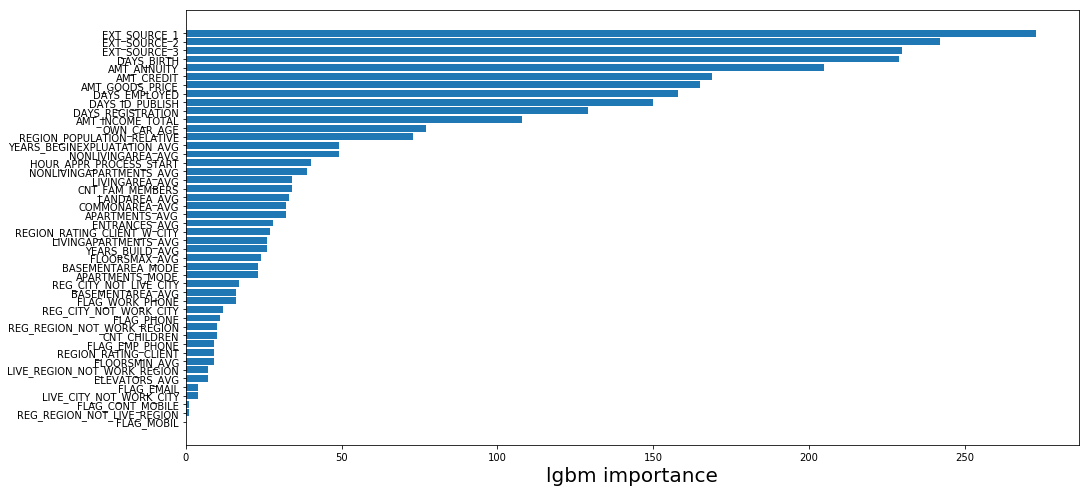

In [38]:
fig = plt.figure(figsize=(16,8))
importances_sort = np.argsort(lgbm_clf.feature_importances_)
ind1 = list(X_train_f)
ind1 = [ind1[i] for i in importances_sort]
plt.barh(ind1, lgbm_clf.feature_importances_[importances_sort])
plt.xlabel('lgbm importance', fontsize=20)

Text(0.5, 0, 'cat importance')

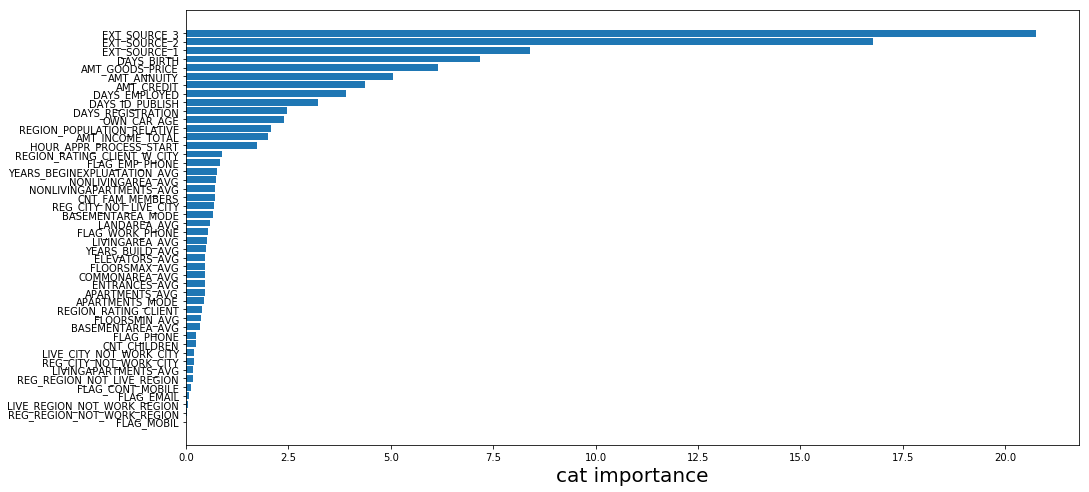

In [39]:
fig = plt.figure(figsize=(16,8))
importances_sort = np.argsort(cat_clf.feature_importances_)
ind2 = list(X_train_f)
ind2 = [ind2[i] for i in importances_sort]
plt.barh(ind2, cat_clf.feature_importances_[importances_sort])
plt.xlabel('cat importance', fontsize=20)

In [46]:
lgbm_feat = ind1[-12:]
X_train_lgbm = X_train_f[lgbm_feat]
X_test_lgbm = X_test_f[lgbm_feat]

In [47]:
cat_feat = ind2[-15:]
X_train_cat = X_train_f[cat_feat]
X_test_cat = X_test_f[cat_feat]

In [49]:
start = time. time()
lgbm_clf.fit(X_train_lgbm, y_train)
end = time. time()
print('LGBMClassifier time: ', end - start)
precision1, recall1, _ = precision_recall_curve(y_test, lgbm_clf.predict_proba(X_test_lgbm)[:, 1])
auc(recall1, precision1)

LGBMClassifier time:  2.221052885055542


0.2275442150172889

In [50]:
start = time. time()
cat_clf.fit(X_train_cat, y_train)
end = time. time()
print('CatBoostClassifier time: ', end - start)
precision2, recall2, _ = precision_recall_curve(y_test, cat_clf.predict_proba(X_test_cat)[:, 1])
auc(recall2, precision2)

CatBoostClassifier time:  89.54234266281128


0.22881452067675556

Качество упало для LGBMClassifier на 0.002, а в CatBoostClassifier на 0.003.

__Задание 7. (0.001 балла)__

Приложите ссылку на любимое короткое видео на YouTube, чтобы поднять проверяющему настроение.

https://www.youtube.com/watch?v=VRraKdjnzhM